# Regresión Polinómica (Python)
---
La regresión polinómica utiliza el método de mínimos cuadrados para encontrar la curva polinómica que resulta en la menor suma de errores al cuadrado (RMSE: Root Mean Square Error).  

La forma de una regresión polinómica tendrá la forma: Y = a*X^b

In [1]:
# 1. Importar librerías
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from beautifultable import BeautifulTable as BT

from sklearn.model_selection import train_test_split as separar
from sklearn.preprocessing import MinMaxScaler

In [2]:
# 2. Importar datos
datos = pd.read_csv('../Datos/4.1.Salarios2.csv')
datos.head(10)

,Posicion,Nivel,Salario
0,Analista,1,45000
1,Consultor Junior,2,50000
2,Consultor Senior,3,60000
3,Manager,4,80000
4,Manager General,5,110000
5,Manager Regional,6,150000
6,Socio,7,200000
7,Socio Senior,8,300000
8,Nivel-C,9,500000
9,CEO,10,1000000


In [3]:
# 3. Crear variable y respuesta
X = datos['Nivel'].values.reshape(-1,1)
y = datos['Salario'].values.reshape(-1,1)

In [ ]:
# 4. Separar en Entranamiento y Validación
'''
X_train, X_test, y_train, y_test = separar(X, y, test_size=0.3, random_state=0)
print('La forma de X_train es: ', X_train.shape)
print('La forma de y_train es: ', y_train.shape)
print('La forma de X_test es: ', X_test.shape)
print('La forma de y_test es: ', y_test.shape)
'''

In [ ]:
'''
X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)
print('La forma de X_train es: ', X_train.shape)
print('La forma de y_train es: ', X_train.shape)
print('La forma de X_test es: ', X_test.shape)
print('La forma de y_test es: ', y_test.shape)
'''

In [ ]:
# 5. Escalar los datos
'''
En este caso no es necesario porque sklearn ya se encarga.

escaladorX = MinMaxScaler()
X_train = escaladorX.fit_transform(X_train)
X_test  = escaladorX.transform(X_test)

escaladorY = MinMaxScaler()
y_train = escaladorY.fit_transform(y_train)
y_test  = escaladorY.transform(y_test)
'''

In [4]:
# 6. Hagamos una Regresión Lineal para ver porqué nos hace falta la polinómica
from sklearn.linear_model import LinearRegression as LR
regresor_lineal = LR()
regresor_lineal.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [5]:
# 7. Ajustar el model
from sklearn.preprocessing import PolynomialFeatures as Polinomio

# 7.1. Tranformación de la variable
polinomizador = Polinomio(degree=4)
X_poli = polinomizador.fit_transform(X)
print(X_poli)
print(X_poli.shape)
polinomizador.fit(X_poli, y)

# 7.2. Regresión lineal con el resultado la tranformación previa
from sklearn.linear_model import LinearRegression as LR
regresor_polinomico = LR()
regresor_polinomico.fit(X_poli, y)

[[  1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
    1.00000000e+00]
 [  1.00000000e+00   2.00000000e+00   4.00000000e+00   8.00000000e+00
    1.60000000e+01]
 [  1.00000000e+00   3.00000000e+00   9.00000000e+00   2.70000000e+01
    8.10000000e+01]
 [  1.00000000e+00   4.00000000e+00   1.60000000e+01   6.40000000e+01
    2.56000000e+02]
 [  1.00000000e+00   5.00000000e+00   2.50000000e+01   1.25000000e+02
    6.25000000e+02]
 [  1.00000000e+00   6.00000000e+00   3.60000000e+01   2.16000000e+02
    1.29600000e+03]
 [  1.00000000e+00   7.00000000e+00   4.90000000e+01   3.43000000e+02
    2.40100000e+03]
 [  1.00000000e+00   8.00000000e+00   6.40000000e+01   5.12000000e+02
    4.09600000e+03]
 [  1.00000000e+00   9.00000000e+00   8.10000000e+01   7.29000000e+02
    6.56100000e+03]
 [  1.00000000e+00   1.00000000e+01   1.00000000e+02   1.00000000e+03
    1.00000000e+04]]
(10, 5)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
# 8. Hacer las predicciones (predicciones -> y_pred)
'''
y_fit = regresor.predict(X_train) # Valores ajustados durante el entrenamiento
y_pred = regresor.predict(X_test)  # Valores resultantes con la nueva información
'''

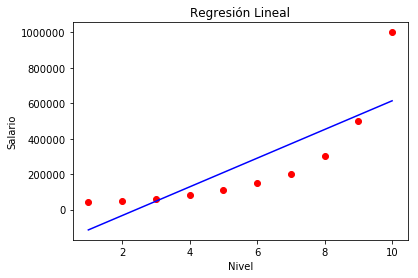

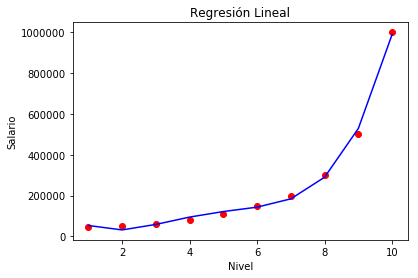

In [6]:
# 8. Echemos un vistazo a la pinta que tienen nuestros ajustes
# 8.1. Para la regresión lineal
plt.scatter(X, y, color = 'red')
plt.plot(X, regresor_lineal.predict(X), color = 'blue')
plt.title('Regresión Lineal')
plt.xlabel('Nivel')
plt.ylabel('Salario')
plt.show()

# 8.2. Para la regresión polinómica
plt.scatter(X, y, color = 'red')
plt.plot(X, regresor_polinomico.predict(X_poli), color = 'blue')
plt.title('Regresión Lineal')
plt.xlabel('Nivel')
plt.ylabel('Salario')
plt.show()

In [7]:
# 9. Cálculo del error
from statsmodels.tools.eval_measures import rmse
RMSE_Lineal = rmse(y, regresor_lineal.predict(X))
RMSE_Polinomico = rmse(y, regresor_polinomico.predict(X_poli))
print('RMSE Lineal = ', RMSE_Lineal)
print('RMSE Polinomico = ', RMSE_Polinomico)

RMSE Lineal =  [ 163388.73519273]
RMSE Polinomico =  [ 14503.23490963]


# Conclusión
---
Hemos visto como la RP establece una relación polinómica entre la variable independiente (predictor) y la variable dependiente (respuesta) en función de los datos disponibles en el conjunto de entrenamiento, y como aplica esta función para obtener nuevas prediciones con la nueva información disponible en el conjunto de validación.

Hemos visto como en ciertas ocasiones la relaciones entre dichas variables no es lineal, y por lo tanto no podemos confiar en un regresor lineal, y podremos encontrar un regresor polinómico que se ajuste a los datos mucho mejor. ¡Pero mucho cuidado con el sobre ajuste!